# Predict number of upvotes 
https://datahack.analyticsvidhya.com/contest/enigma-codefest-machine-learning-1/  
**Aleksey Shipitsyn**    
**2019-08-08**

## Data readigng and exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [2]:
# data files names
folder = './Documents/Competitions/Number of upvotes/'
file_train = 'train_NIR5Yl1.xls'
file_test = 'test_8i3B3FC.xls'
file_submission = 'sample_submission_OR5kZa5.xls'


## Variables Definition

**ID** = Question ID  
**Tag** = Anonymised tags representing question category  
**Reputation** = Reputation score of question author  
**Answers**	= Number of times question has been answered  
**Username** = Anonymised user ID of question author  
**Views** = Number of times question has been viewed  
**Upvotes** = (Target) Number of upvotes for the question  


In [3]:
# read and check train data
df_train = pd.read_csv(folder + file_train) 

print('DF shape: {}\n'.format(df_train.shape))
print('TYPES:\n\n{}\n\n'.format(df_train.dtypes))
print('MISSING VALUES:\n\n{}'.format(df_train.isnull().sum()))


DF shape: (330045, 7)

TYPES:

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object


MISSING VALUES:

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64


In [4]:
df_train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [5]:
# read and check test data
df_test = pd.read_csv(folder + file_test) 

print('DF shape: {}\n'.format(df_test.shape))
print('TYPES:\n\n{}\n\n'.format(df_test.dtypes))
print('MISSING VALUES:\n\n{}'.format(df_test.isnull().sum()))
df_test.head()


DF shape: (141448, 6)

TYPES:

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
dtype: object


MISSING VALUES:

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64


,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [6]:
# read submission data
df_submission = pd.read_csv(folder + file_submission)

# check if submission hash corresponds to test set
print('Submission and test files ID match: {}\n'.format(all(np.array(df_test['ID']) == df_submission['ID'])))

print('DF shape: {}\n'.format(df_submission.shape))
print('TYPES:\n\n{}\n'.format(df_submission.dtypes))

df_submission.head()


Submission and test files ID match: False

DF shape: (141448, 2)

TYPES:

ID         int64
Upvotes    int64
dtype: object



,ID,Upvotes
0,7,500
1,9,500
2,12,500
3,13,500
4,16,500


In [7]:
# match ID of test and submission files

print('Submission file is sorted: {}\n'.format(all(np.array(df_submission['ID']) == np.sort(df_submission['ID']))))

# sort the test set to match
df_test = df_test.sort_values(by='ID')

print('Submission and test files ID match: {}\n'.format(all(np.array(df_test['ID']) == df_submission['ID'])))



Submission file is sorted: True

Submission and test files ID match: True



In [8]:
# check ID uniqueness

print('Train data, all unique ID: {}'.format(len(df_train.ID.unique()) == df_train.shape[0]))
print('Test data, all unique ID: {}'.format(len(df_test.ID.unique()) == df_test.shape[0]))


Train data, all unique ID: True
Test data, all unique ID: True


## Data preprocessing  

- Select vars of interest
- Normalize numeric vars
- Categorical to dummy  
- Train data split for training and validation subsets  


In [9]:
# check target outliers
def summary(x):
    return {'min': np.min(x), 
            'mean': np.mean(x), 
            'median': np.median(x),
            'percentile_95': np.percentile(x, 95), 
            'percentile_99': np.percentile(x, 99),
            'max': np.max(x)}


def log_normilize(a):
    x = a.copy()
    x[x == 0] = 0.000001
    x = np.log(x)
    x[x < 0] = -1
    return x


In [10]:
#sns.pairplot(df_train[['Reputation','Answers','Views','Upvotes']], height=1.5);

### Normalize numeric vars

In [11]:
# select columns for X and y
col = df_train.columns[(df_train.columns != 'Upvotes') & (df_train.columns != 'ID')]
X = df_train[col].copy()
y = df_train['Upvotes'].copy().ravel()
X_test = df_test[col].copy()


In [12]:
# target
summary(y)

{'min': 0.0,
 'mean': 337.5053583602236,
 'median': 28.0,
 'percentile_95': 959.0,
 'percentile_99': 5030.0,
 'max': 615278.0}

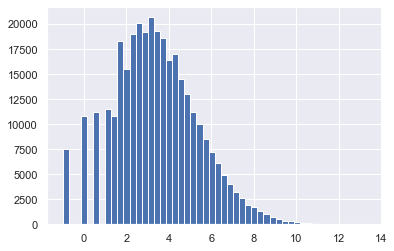

In [13]:
y = log_normilize(y)
plt.hist(y, bins=50);

In [14]:
summary(X.Reputation)

{'min': 0.0,
 'mean': 7773.146798163887,
 'median': 1236.0,
 'percentile_95': 32209.0,
 'percentile_99': 113925.0,
 'max': 1042428.0}

In [15]:
X[['Reputation','Answers','Views']] = X[['Reputation','Answers','Views']].apply(lambda x: log_normilize(x))

X_test[['Reputation','Answers','Views']] = X_test[['Reputation','Answers','Views']].apply(lambda x: log_normilize(x))

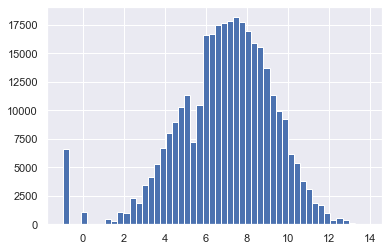

In [16]:
plt.hist(X.Reputation, bins=50);

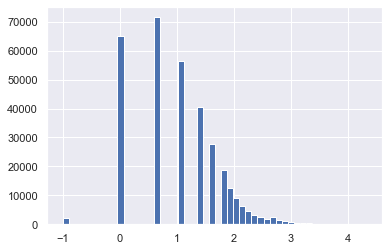

In [17]:
plt.hist(X.Answers, bins=50);

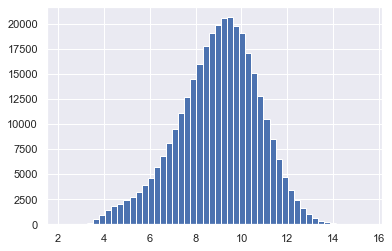

In [18]:
plt.hist(X.Views, bins=50);

In [19]:
#sns.pairplot(X[['Reputation','Answers','Views']], height=1.5);

In [20]:
# Username classes 
print('Number of different users: {}'.format(len(X.Username.unique())))


Number of different users: 141802


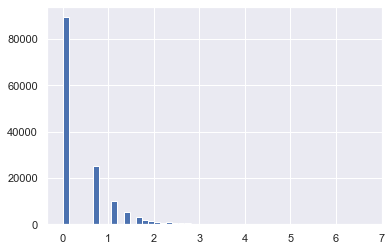

In [21]:
# Post count
tab = pd.crosstab(index=X.Username, columns=['Username'], normalize=False)
tab = pd.DataFrame({'Username': np.array(tab.index), 'N_posts': tab.values.ravel()})
tab['N_posts'] = log_normilize(tab['N_posts'])

plt.hist(tab.N_posts, bins=50); 


In [22]:
# Add count of post as a feature
X = X.merge(tab, how='left', on='Username').copy()
X_test = X_test.merge(tab, how='left', on='Username').copy()
X_test.loc[X_test.N_posts.isnull(), 'N_posts'] = 0

# delete Username
X = X.drop(columns='Username').copy()
X_test = X_test.drop(columns='Username').copy()

# check missing values
print('MISSING VALUES in X:\n\n{}'.format(X.isnull().sum()))
print('MISSING VALUES in X_test:\n\n{}'.format(X_test.isnull().sum()))


MISSING VALUES in X:

Tag           0
Reputation    0
Answers       0
Views         0
N_posts       0
dtype: int64
MISSING VALUES in X_test:

Tag           0
Reputation    0
Answers       0
Views         0
N_posts       0
dtype: int64


In [23]:
# Add polinomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)

X2 = pd.DataFrame(poly.fit_transform(X[['Reputation','Answers','Views','N_posts']]))
X2_test = pd.DataFrame(poly.transform(X_test[['Reputation','Answers','Views','N_posts']]))

# check missing values
print('MISSING VALUES in X: {}'.format(sum(X2.isnull().sum())))
print('MISSING VALUES in X_test: {}'.format(sum(X2_test.isnull().sum())))

X2.shape, X2_test.shape


MISSING VALUES in X: 0
MISSING VALUES in X_test: 0


((330045, 125), (141448, 125))

### Categorical to dummy

In [24]:
# Tags classes
pd.crosstab(index=X.Tag, columns=['Tag'], normalize=True).round(2)


col_0,Tag
Tag,
a,0.10
c,0.22
h,0.06
i,0.10
j,0.22
o,0.04
p,0.13
r,0.04
s,0.07


In [25]:
# combine training and test data for complete categories sets
combind = pd.concat([X.Tag, X_test.Tag], ignore_index=True, axis=0)

print('Shape before: {}'.format([X.shape, X_test.shape, combind.shape]))

# to dummies
D = pd.get_dummies(combind, drop_first=True).copy()
X_tag = D.loc[:(X.shape[0]-1),].copy()
X_tag_test = D.loc[X.shape[0]:,].copy()

# reset index to join correctly
X_tag_test.set_index(X2_test.index, inplace=True)


print('Shape after: {}'.format([X_tag.shape, X_tag_test.shape]))

print('MISSING VALUES X_tag: {}'.format(sum(X_tag.isnull().sum())))
print('MISSING VALUES X_tag_test: {}'.format(sum(X_tag_test.isnull().sum())))


# join all features
X = pd.concat([X2, X_tag], ignore_index=True, axis=1).copy()

X_test = pd.concat([X2_test, X_tag_test], ignore_index=True, axis=1).copy()

print('Shape features: {}\n'.format([X.shape, X_test.shape]))


Shape before: [(330045, 5), (141448, 5), (471493,)]
Shape after: [(330045, 9), (141448, 9)]
MISSING VALUES X_tag: 0
MISSING VALUES X_tag_test: 0
Shape features: [(330045, 134), (141448, 134)]



In [26]:
"""
# combine training and test data for complete categories sets
combind = pd.concat([X, X_test], ignore_index=True, axis=0)

print('Shape before: {}'.format([X.shape, X_test.shape, combind.shape]))

# to dummies
D = pd.get_dummies(combind, drop_first=True).copy()
X = D.loc[:(X.shape[0]-1),].copy()
X_test = D.loc[X.shape[0]:,].copy()

print('Shape after: {}'.format([X.shape, X_test.shape]))

print('MISSING VALUES X_tag: {}'.format(sum(X.isnull().sum())))
print('MISSING VALUES X_tag_test: {}'.format(sum(X_test.isnull().sum())))""";


### Scale

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_test = scaler.transform(X_test)


### Train data split for training and validation subsets

In [28]:
# Split training data to training and validation subsets

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape


((247533, 134), (247533,), (82512, 134), (82512,))

## Modeling

In [29]:
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge


In [30]:
from sklearn.metrics import mean_squared_error

def metric(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

### Models

In [31]:
lm = LinearRegression(normalize=False)
lm.fit(X_train, y_train)

lasso = Lasso(normalize=False)
lasso.fit(X_train, y_train)

ridge = Ridge(normalize=False)
ridge.fit(X_train, y_train);

xgb = XGBRFRegressor(n_estimators=100, learning_rate=1, objective='reg:squarederror', n_jobs=8)
xgb.fit(X_train, y_train);


In [32]:
# Evaluation 

print('Linear model:')
print('Score for training set: {}'.format( metric(y_train, lm.predict(X_train))) )
print('Score for validation set: {}\n'.format( metric(y_valid, lm.predict(X_valid))) )


print('Lasso:')
print('Score for training set: {}'.format( metric(y_train, lasso.predict(X_train))) )
print('Score for validation set: {}\n'.format( metric(y_valid, lasso.predict(X_valid))) )


print('Ridge:')
print('Score for training set: {}'.format( metric(y_train, ridge.predict(X_train))) )
print('Score for validation set: {}\n'.format( metric(y_valid, ridge.predict(X_valid))) )

      
print('XGBoost:')
print('Score for training set: {}'.format( metric(y_train, xgb.predict(X_train))) )
print('Score for validation set: {}\n'.format( metric(y_valid, xgb.predict(X_valid))) )



Linear model:
Score for training set: 0.8512145451493458
Score for validation set: 0.8368046836623566

Lasso:
Score for training set: 1.3682837178819842
Score for validation set: 1.3600965809141607

Ridge:
Score for training set: 0.8518517204575935
Score for validation set: 0.8372638939897665

XGBoost:
Score for training set: 0.9190381423988306
Score for validation set: 0.9075222841057358



In [38]:
# retrain the model on all training data

model = ridge
model.fit(X, y)

print('Score for training set: {}'.format(metric(y, model.predict(X))))


Score for training set: 0.8480816142605574


## Submission

In [39]:
pred = model.predict(X_test)
pred = np.exp(pred).round().astype(int)
summary(pred)

# pd.DataFrame({'pred': pred})#, 'y': np.exp(y_valid).round().astype(int)})

{'min': 0,
 'mean': 307.2305016684577,
 'median': 23.0,
 'percentile_95': 946.0,
 'percentile_99': 5164.059999999998,
 'max': 176381}

In [40]:
df_submission['Upvotes'] = pred

df_submission.to_csv(folder + 'submission_11.csv', index=False)

df_submission.head()


,ID,Upvotes
0,7,690
1,9,19
2,12,43
3,13,312
4,16,28


In [37]:
# rank at submission
rank = 396
participants = 2320
print('Acheaved rank is {} from {} participants, or top {} %'.format(
            rank, participants, round(100*rank/participants, 2)))
            

Acheaved rank is 396 from 2320 participants, or top 17.07 %
